# Lab №2

## Выполнение

### 0. Импортируем необходимые библиотеки 

In [1]:
from math import pi
import numpy as np
import roboticstoolbox as rtb
import matplotlib.pyplot as plt
import spatialmath.base as sb

### 1. Импортируем модель Puma560

In [2]:
print("DH Models:")
for model in dir(rtb.models.DH):
    if not model.startswith("__"):
        print(f"- {model}") 

DH Models:
- AL5D
- Ball
- Baxter
- Cobra600
- Coil
- Hyper
- Hyper3d
- IRB140
- Jaco
- KR5
- LWR4
- Mico
- Orion5
- P8
- Panda
- Planar2
- Planar3
- Puma560
- Sawyer
- Stanford
- TwoLink
- UR10
- UR3
- UR5


In [3]:
robot = rtb.models.DH.Panda() 
print(robot)

DHRobot: Panda (by Franka Emika), 7 joints (RRRRRRR), dynamics, geometry, modified DH parameters
┌─────────┬────────┬─────┬───────┬─────────┬────────┐
│  aⱼ₋₁   │  ⍺ⱼ₋₁  │ θⱼ  │  dⱼ   │   q⁻    │   q⁺   │
├─────────┼────────┼─────┼───────┼─────────┼────────┤
│     0.0 │   0.0° │  q1 │ 0.333 │ -166.0° │ 166.0° │
│     0.0 │ -90.0° │  q2 │   0.0 │ -101.0° │ 101.0° │
│     0.0 │  90.0° │  q3 │ 0.316 │ -166.0° │ 166.0° │
│  0.0825 │  90.0° │  q4 │   0.0 │ -176.0° │  -4.0° │
│ -0.0825 │ -90.0° │  q5 │ 0.384 │ -166.0° │ 166.0° │
│     0.0 │  90.0° │  q6 │   0.0 │   -1.0° │ 215.0° │
│   0.088 │  90.0° │  q7 │ 0.107 │ -166.0° │ 166.0° │
└─────────┴────────┴─────┴───────┴─────────┴────────┘

┌──────┬───────────────────────────────────────┐
│ tool │ t = 0, 0, 0.1; rpy/xyz = -45°, 0°, 0° │
└──────┴───────────────────────────────────────┘

┌──────┬─────┬────────┬─────┬───────┬─────┬───────┬──────┐
│ name │ q0  │ q1     │ q2  │ q3    │ q4  │ q5    │ q6   │
├──────┼─────┼────────┼─────┼───────┼─────

In [4]:
# Set mass values for all links
robot.links[0].m = 5
robot.links[1].m = 0.65
robot.links[2].m = 3.2
robot.links[3].m = 3.6
robot.links[4].m = 1.2
robot.links[5].m = 1.7
robot.links[6].m = 0.74

✅ Mass values set for all 7 links


In [5]:
# Set center of mass coordinates

robot.links[0].r = [0.7, -0.00014, 0.0068]
robot.links[1].r = [0.008, -0.0039, 0.01]
robot.links[2].r = [0.037, -0.0048, -0.011]
robot.links[3].r = [0.026, 0.0078, -0.0013]
robot.links[4].r = [0.036, -0.0021, -0.004]
robot.links[5].r = [0.002, 0.00011, -0.0012]
robot.links[6].r = [0.013, -0.00043, -0.0012]

In [6]:
robot.links[0].I = np.array([
    [0.7,     -0.00014, 0.0068], 
    [-0.00014, 0.71,     0.019],
    [0.0068,   0.019,    0.0091]
]) # We have to make use of numpy arrays to define the inertia matrix of the links

robot.links[1].I = np.array([
    [0.028,   -0.0039,  0.01],
    [-0.0039,  0.028,   0.0007],
    [0.01,     0.0007,  0.026]
])

robot.links[2].I = np.array([
    [0.036,   -0.0048, -0.011],
    [-0.0048,  0.036,  -0.013],
    [-0.011,  -0.013,   0.011]
])

robot.links[3].I = np.array([
    [0.02,     0.0078, -0.0013],
    [0.0078,   0.02,    0.0086],
    [-0.0013,  0.0086,  0.028]
])

robot.links[4].I = np.array([
    [0.029,   -0.0021, -0.004],
    [-0.0021,  0.029,   0.00023],
    [-0.004,   0.00023, 0.0086]
])

robot.links[5].I = np.array([
    [0.0044,   0.00011, -0.0012],
    [0.00011,  0.0044,   0.00034],
    [-0.0012,  0.00034,  0.0054]
])

robot.links[6].I = np.array([
    [0.01,    -0.00043, -0.0012],
    [-0.00043, 0.01,    -0.00074],
    [-0.0012, -0.00074,  0.0048]
])

In [7]:
for i in range(7):
    robot.links[i].Jm = 0    # Moment of inertia
    robot.links[i].B = 0     # Viscous friction
    robot.links[i].Tc = [0, 0]  # Coulomb friction
    robot.links[i].G = 1     # Gear ratio

### 2. Зададим начальное положение робота и построим его

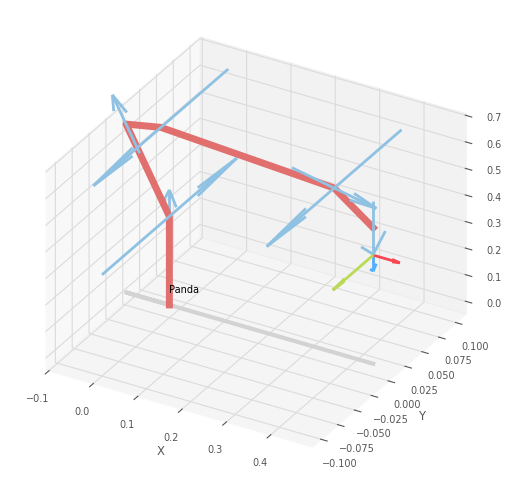

<Figure size 640x480 with 0 Axes>

In [8]:
q_start = [0, -pi/10, 0, -7*pi/10, 0, 3*pi/5, pi/4]
robot.plot(q_start)
plt.show()

### 3. Решим прямую задачу кинематики

In [9]:
T_start = robot.fkine(q_start)
print(T_start)

   1         0         0         0.4595    
   0        -1         0         0         
   0         0        -1         0.4088    
   0         0         0         1         



### 6. Построим рабочую зону манипулятора

Инициализируем переменные

In [34]:
n = 20  # Количество точек по каждой оси
i = 0  # Просто счетчик
move = [np.linspace(robot.links[i].qlim[0], robot.links[i].qlim[1], n) for i in range(4)] # Записываем пределы перемещения для первых трех звеньев
pose = np.zeros([3, n**4])  # 4D space: n^4 points # Создаем пустой массив для записи данных

Рассчитываем рабочую зону

In [35]:
# Проходимся перебором по каждой точке
for q1 in move[0]:
    for q2 in move[1]:
        for q3 in move[2]:
            for q4 in move[3]:
                Tt = robot.fkine([q1, q2, q3, q4, 0, pi/4,0])
                for j in range(3):
                    pose[j][i] = Tt.t[j]
                i += 1

Строим рабочую зону

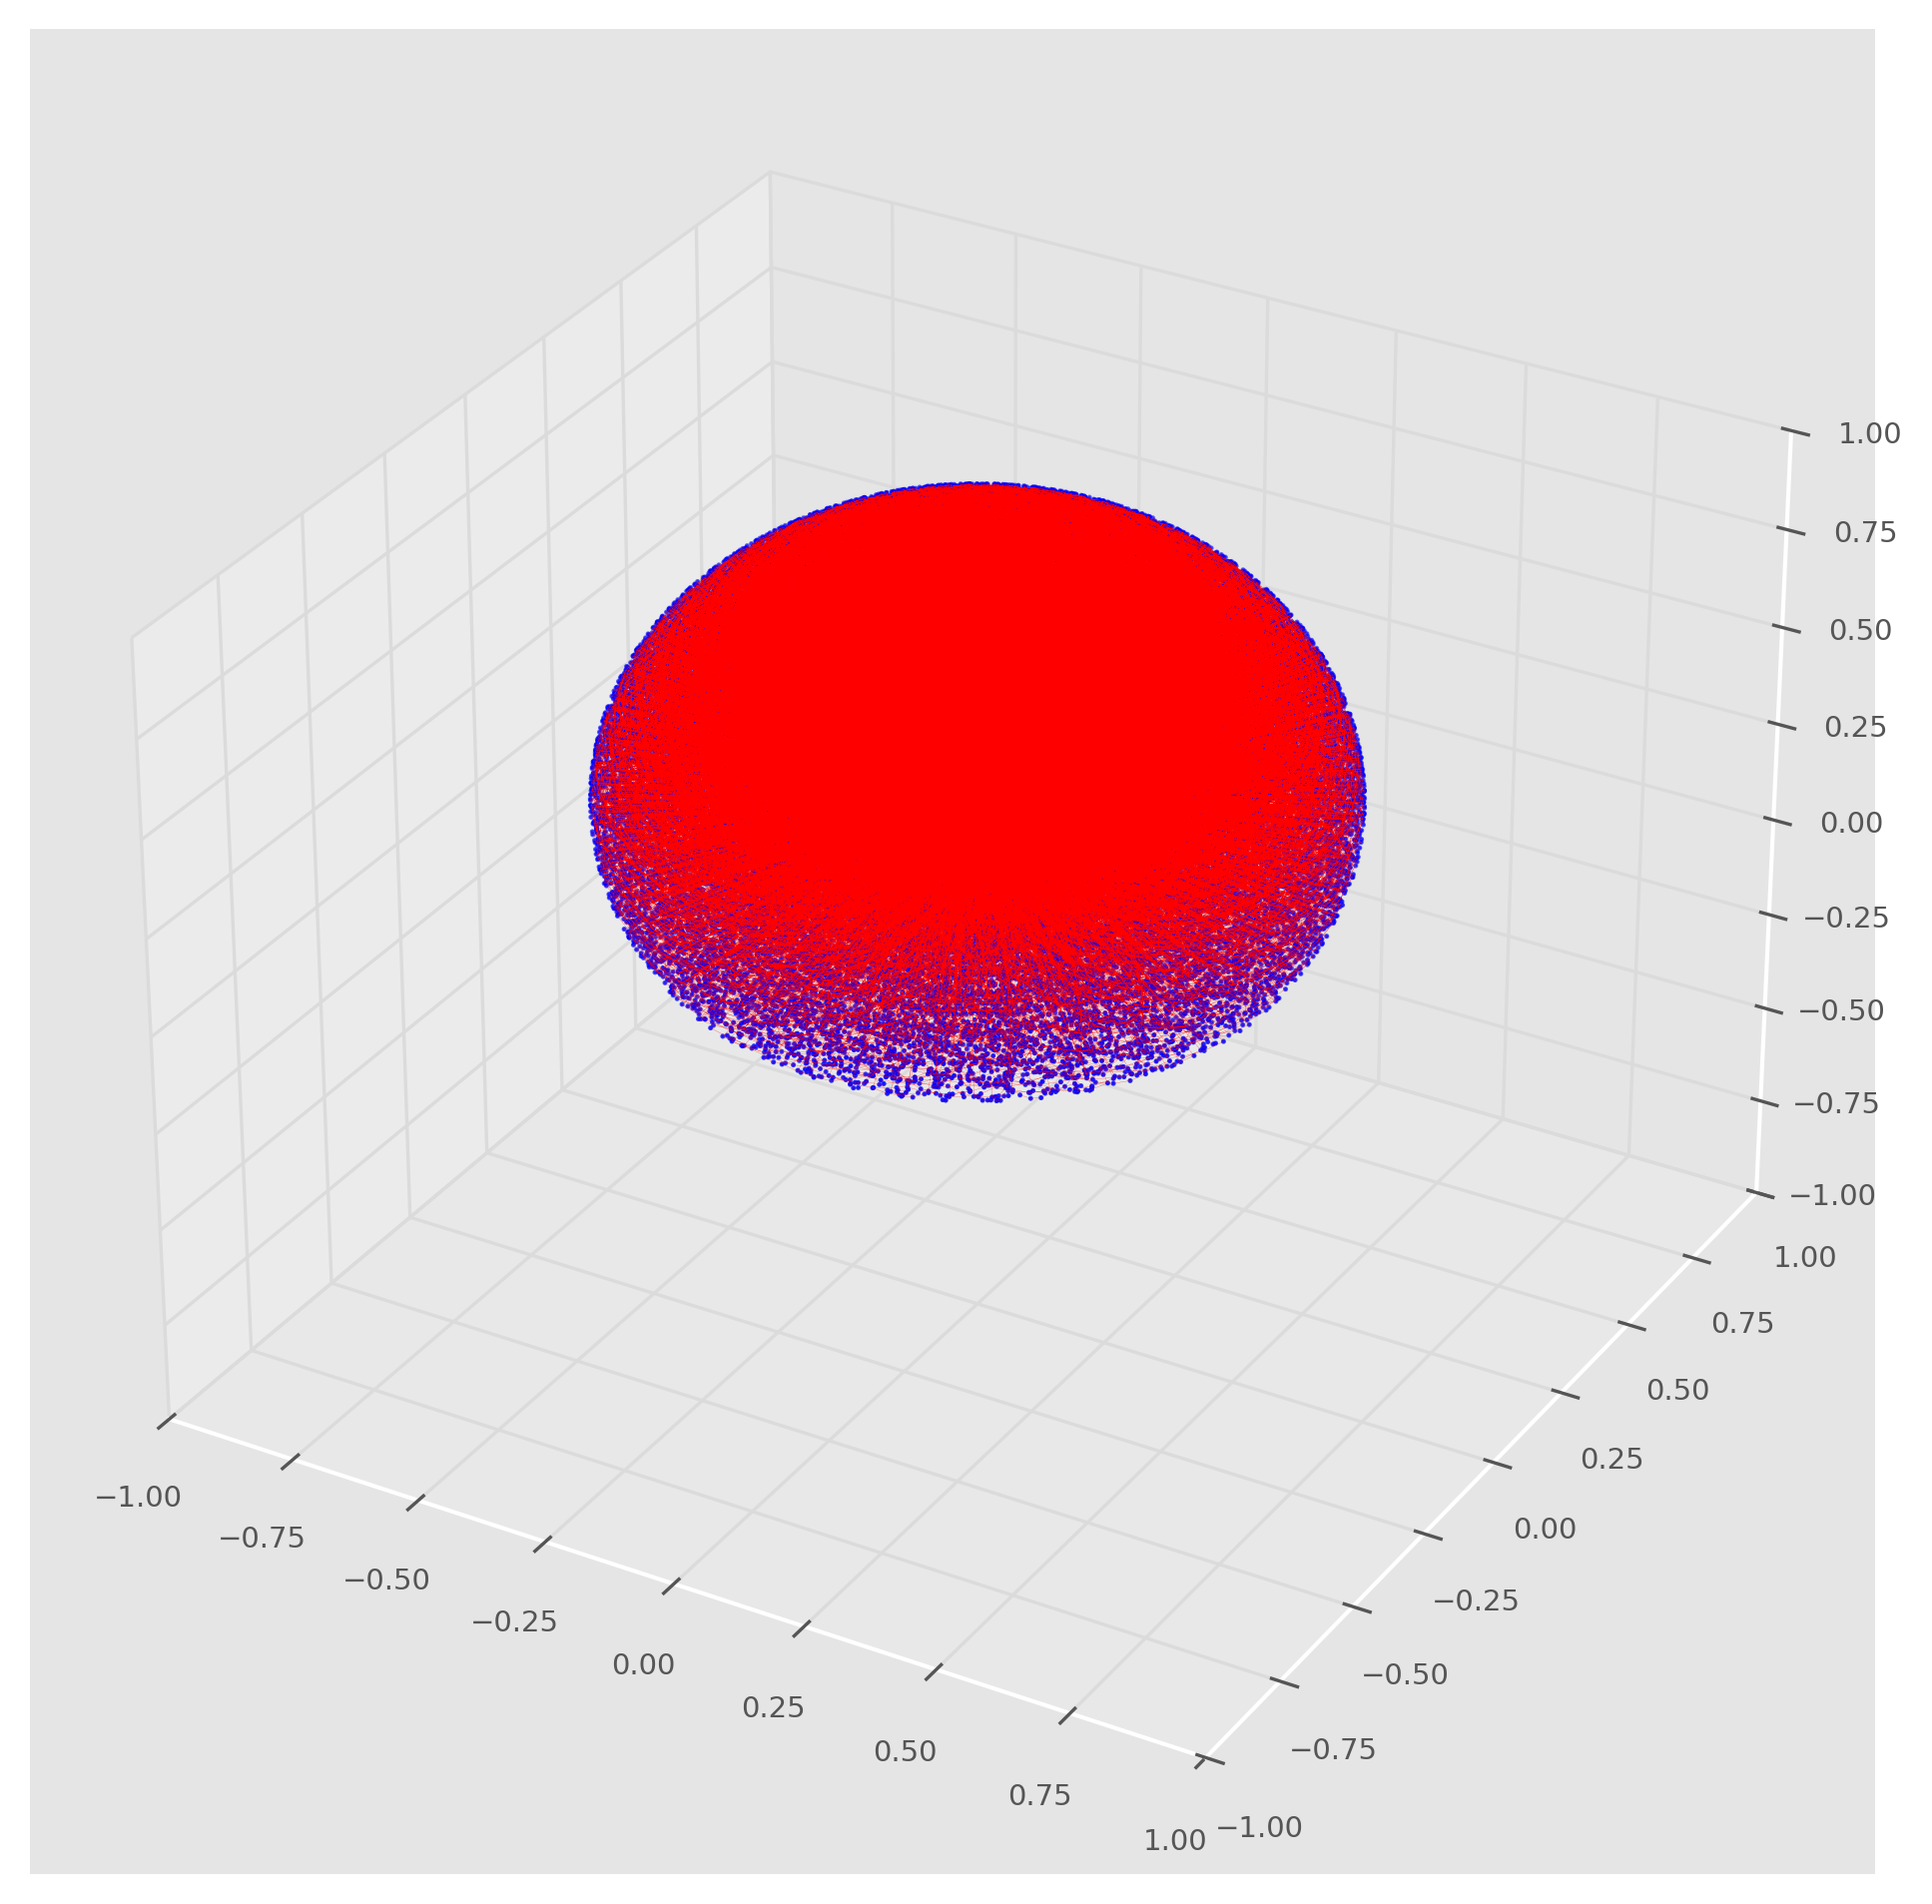

In [38]:
plt.figure(figsize=(8,8), dpi=300)
ax = plt.axes(projection="3d")
ax.plot3D(pose[0], pose[1], pose[2], color='red', linewidth=0.05)
ax.scatter3D(pose[0], pose[1], pose[2], s=0.5, color='blue')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

### 7. Выберем конечную точку и проверим её (решим обратную задачу кинематики)

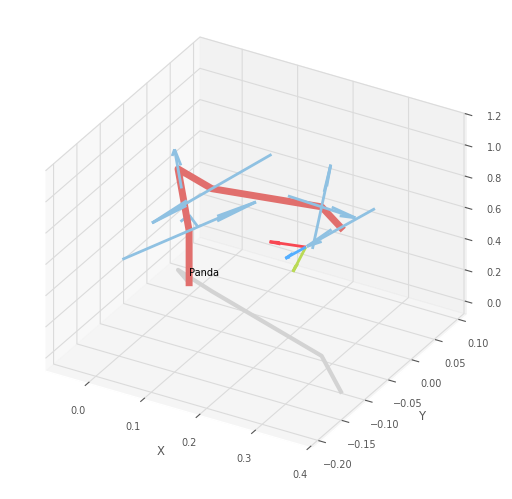

<Figure size 640x480 with 0 Axes>

In [50]:
point = [-0.5,0.1,0.2]
T_end = sb.transl(point)
q_end = robot.ikine_GN(T_end).q  # Есть другие методы, помимо ikine_GN
robot.plot(q_end)
plt.show()

### 8. Спланируем траекторию

Спланируем траекторию методом 'jtraj' для $N$ = 100 точек

In [51]:
N = 100
t_start = 0
t_stop = 5
t_shag = t_stop/N
time = np.arange(t_start, t_stop, t_shag)

tr_jtraj = rtb.jtraj(q_start, q_end, time)

Спланируем ту же траекторию методом 'mtraj' с функцией 'trapezoidal'

In [52]:
tr_trap = rtb.mtraj(rtb.trapezoidal, q_start, q_end, time)

Спланируем ту же траекторию методом 'mtraj' с функцией 'quintic'

In [53]:
tr_quin = rtb.mtraj(rtb.quintic, q_start, q_end, time)

### 9. Построим графики

Построим графики положений для каждого звена

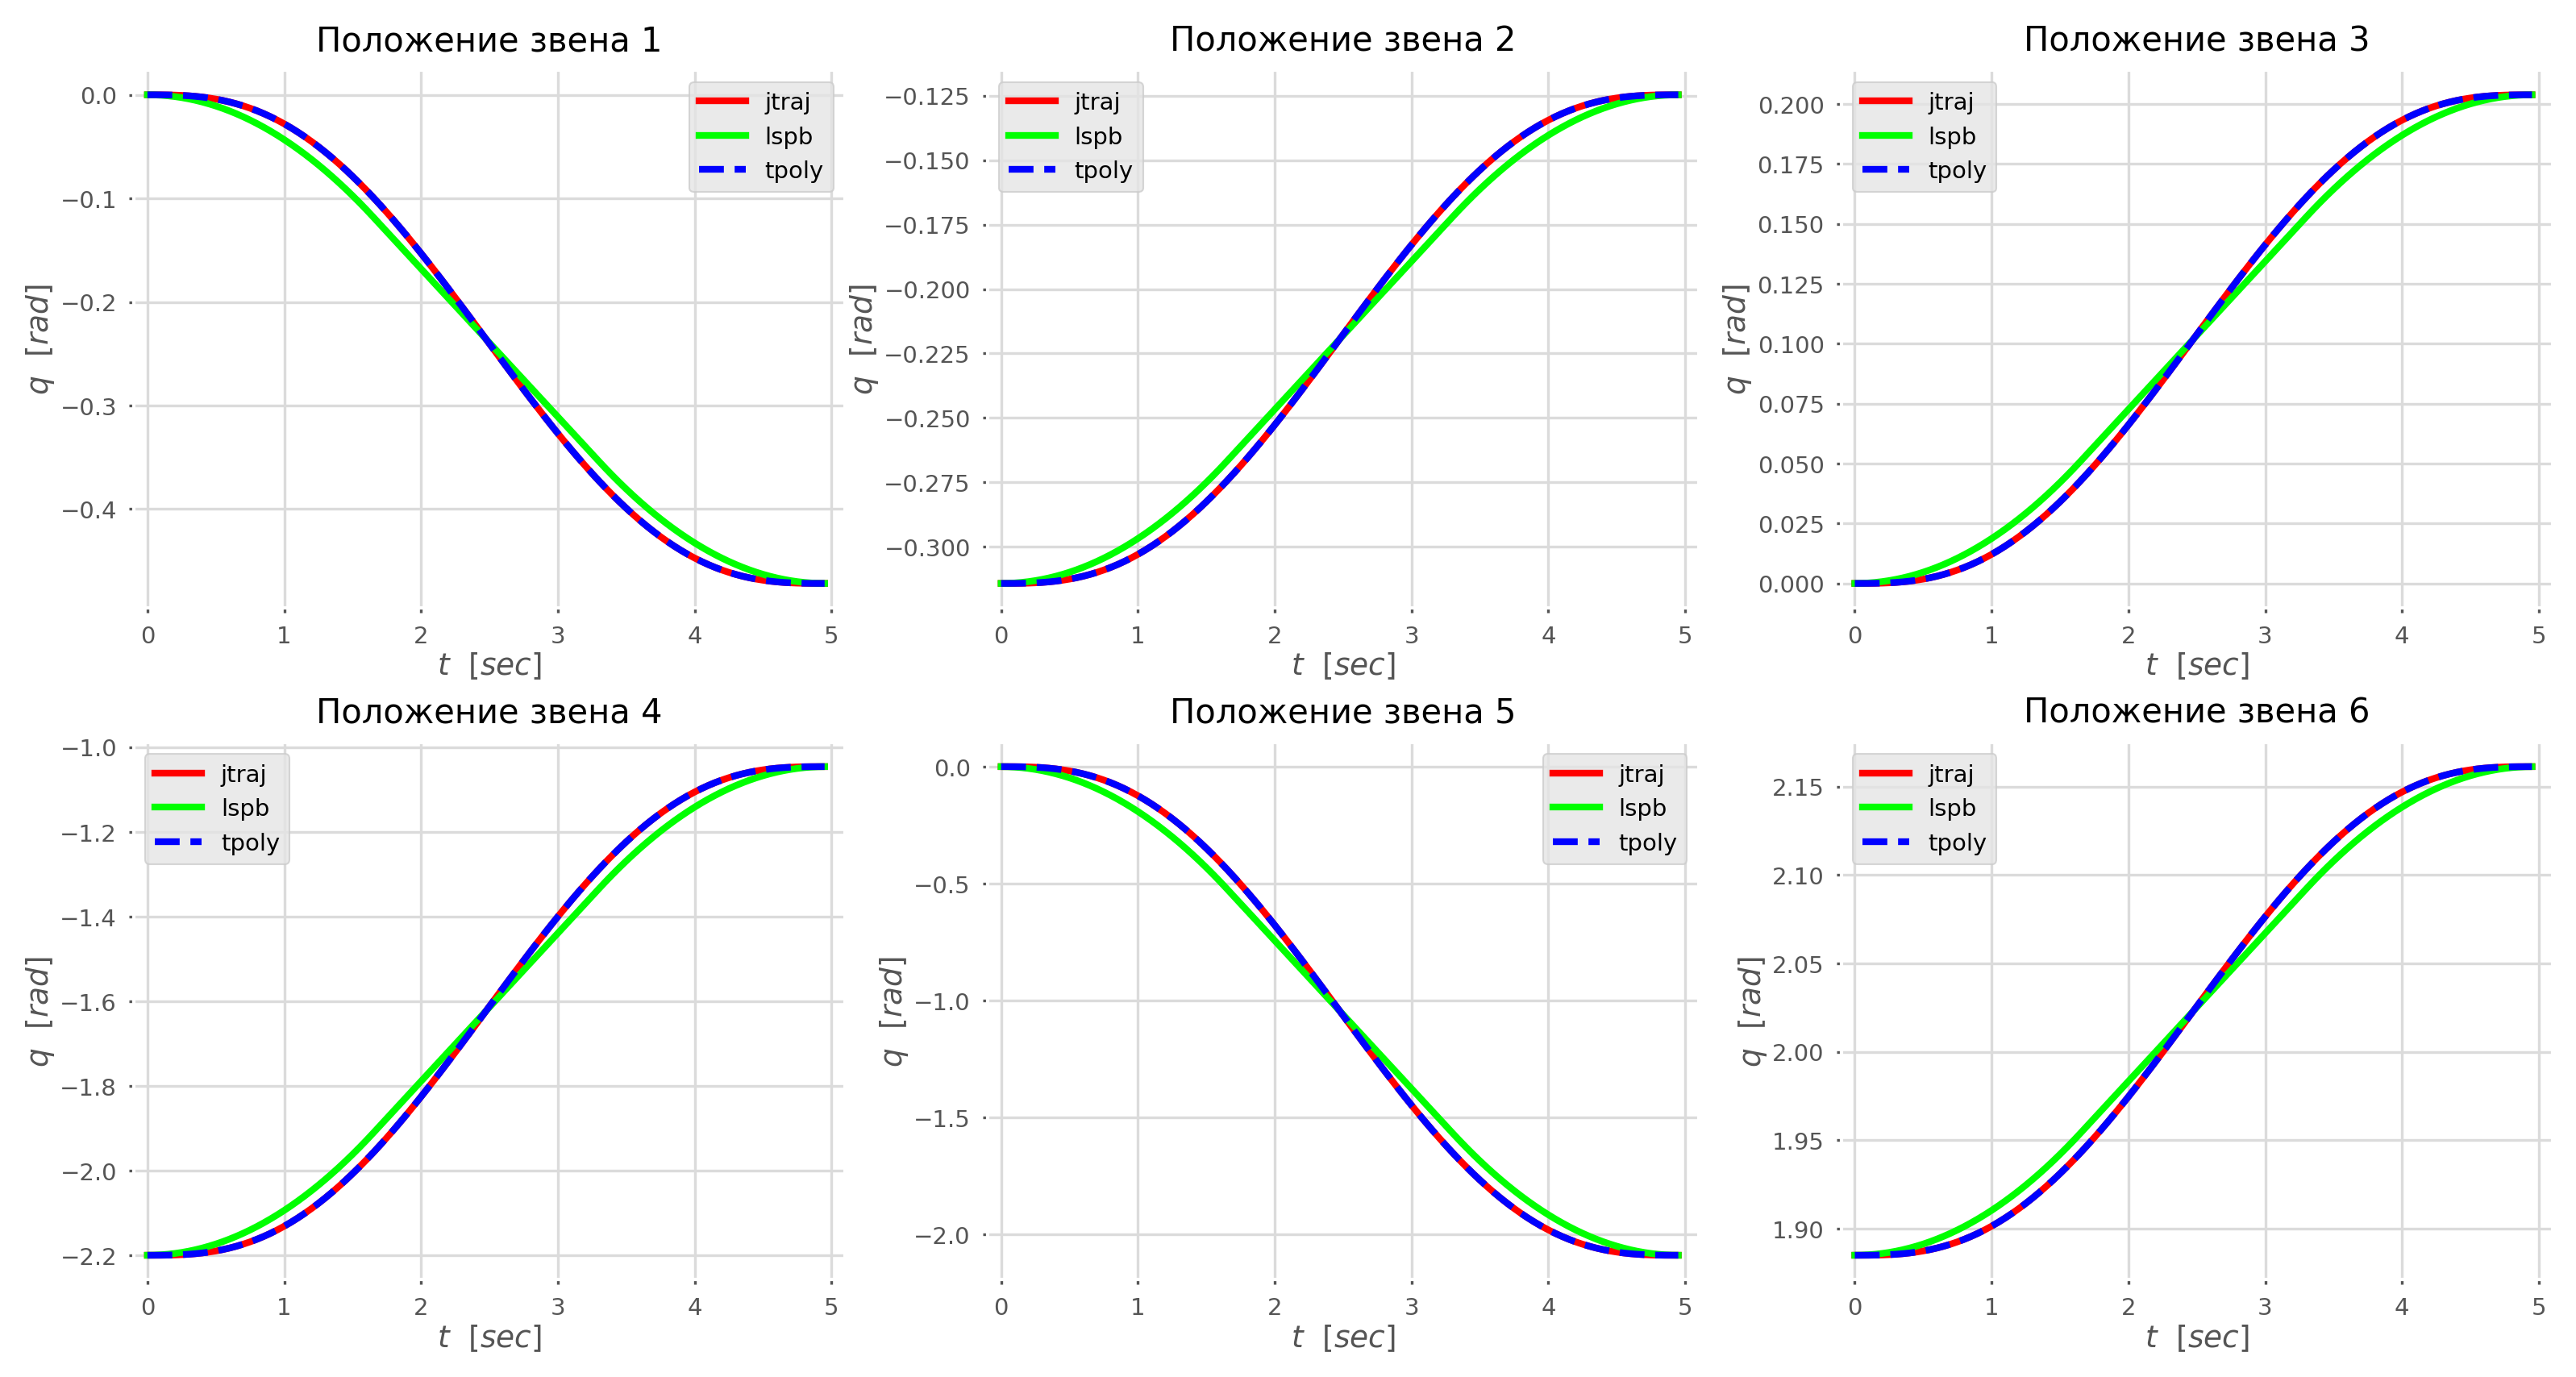

In [54]:
plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.q[i][g-1] for i in range(len(tr_jtraj.q))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.q[i][g-1] for i in range(len(tr_trap.q))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.q[i][g-1] for i in range(len(tr_quin.q))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Положение звена {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$q$  [$rad$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

Построим графики скоростей для каждого звена

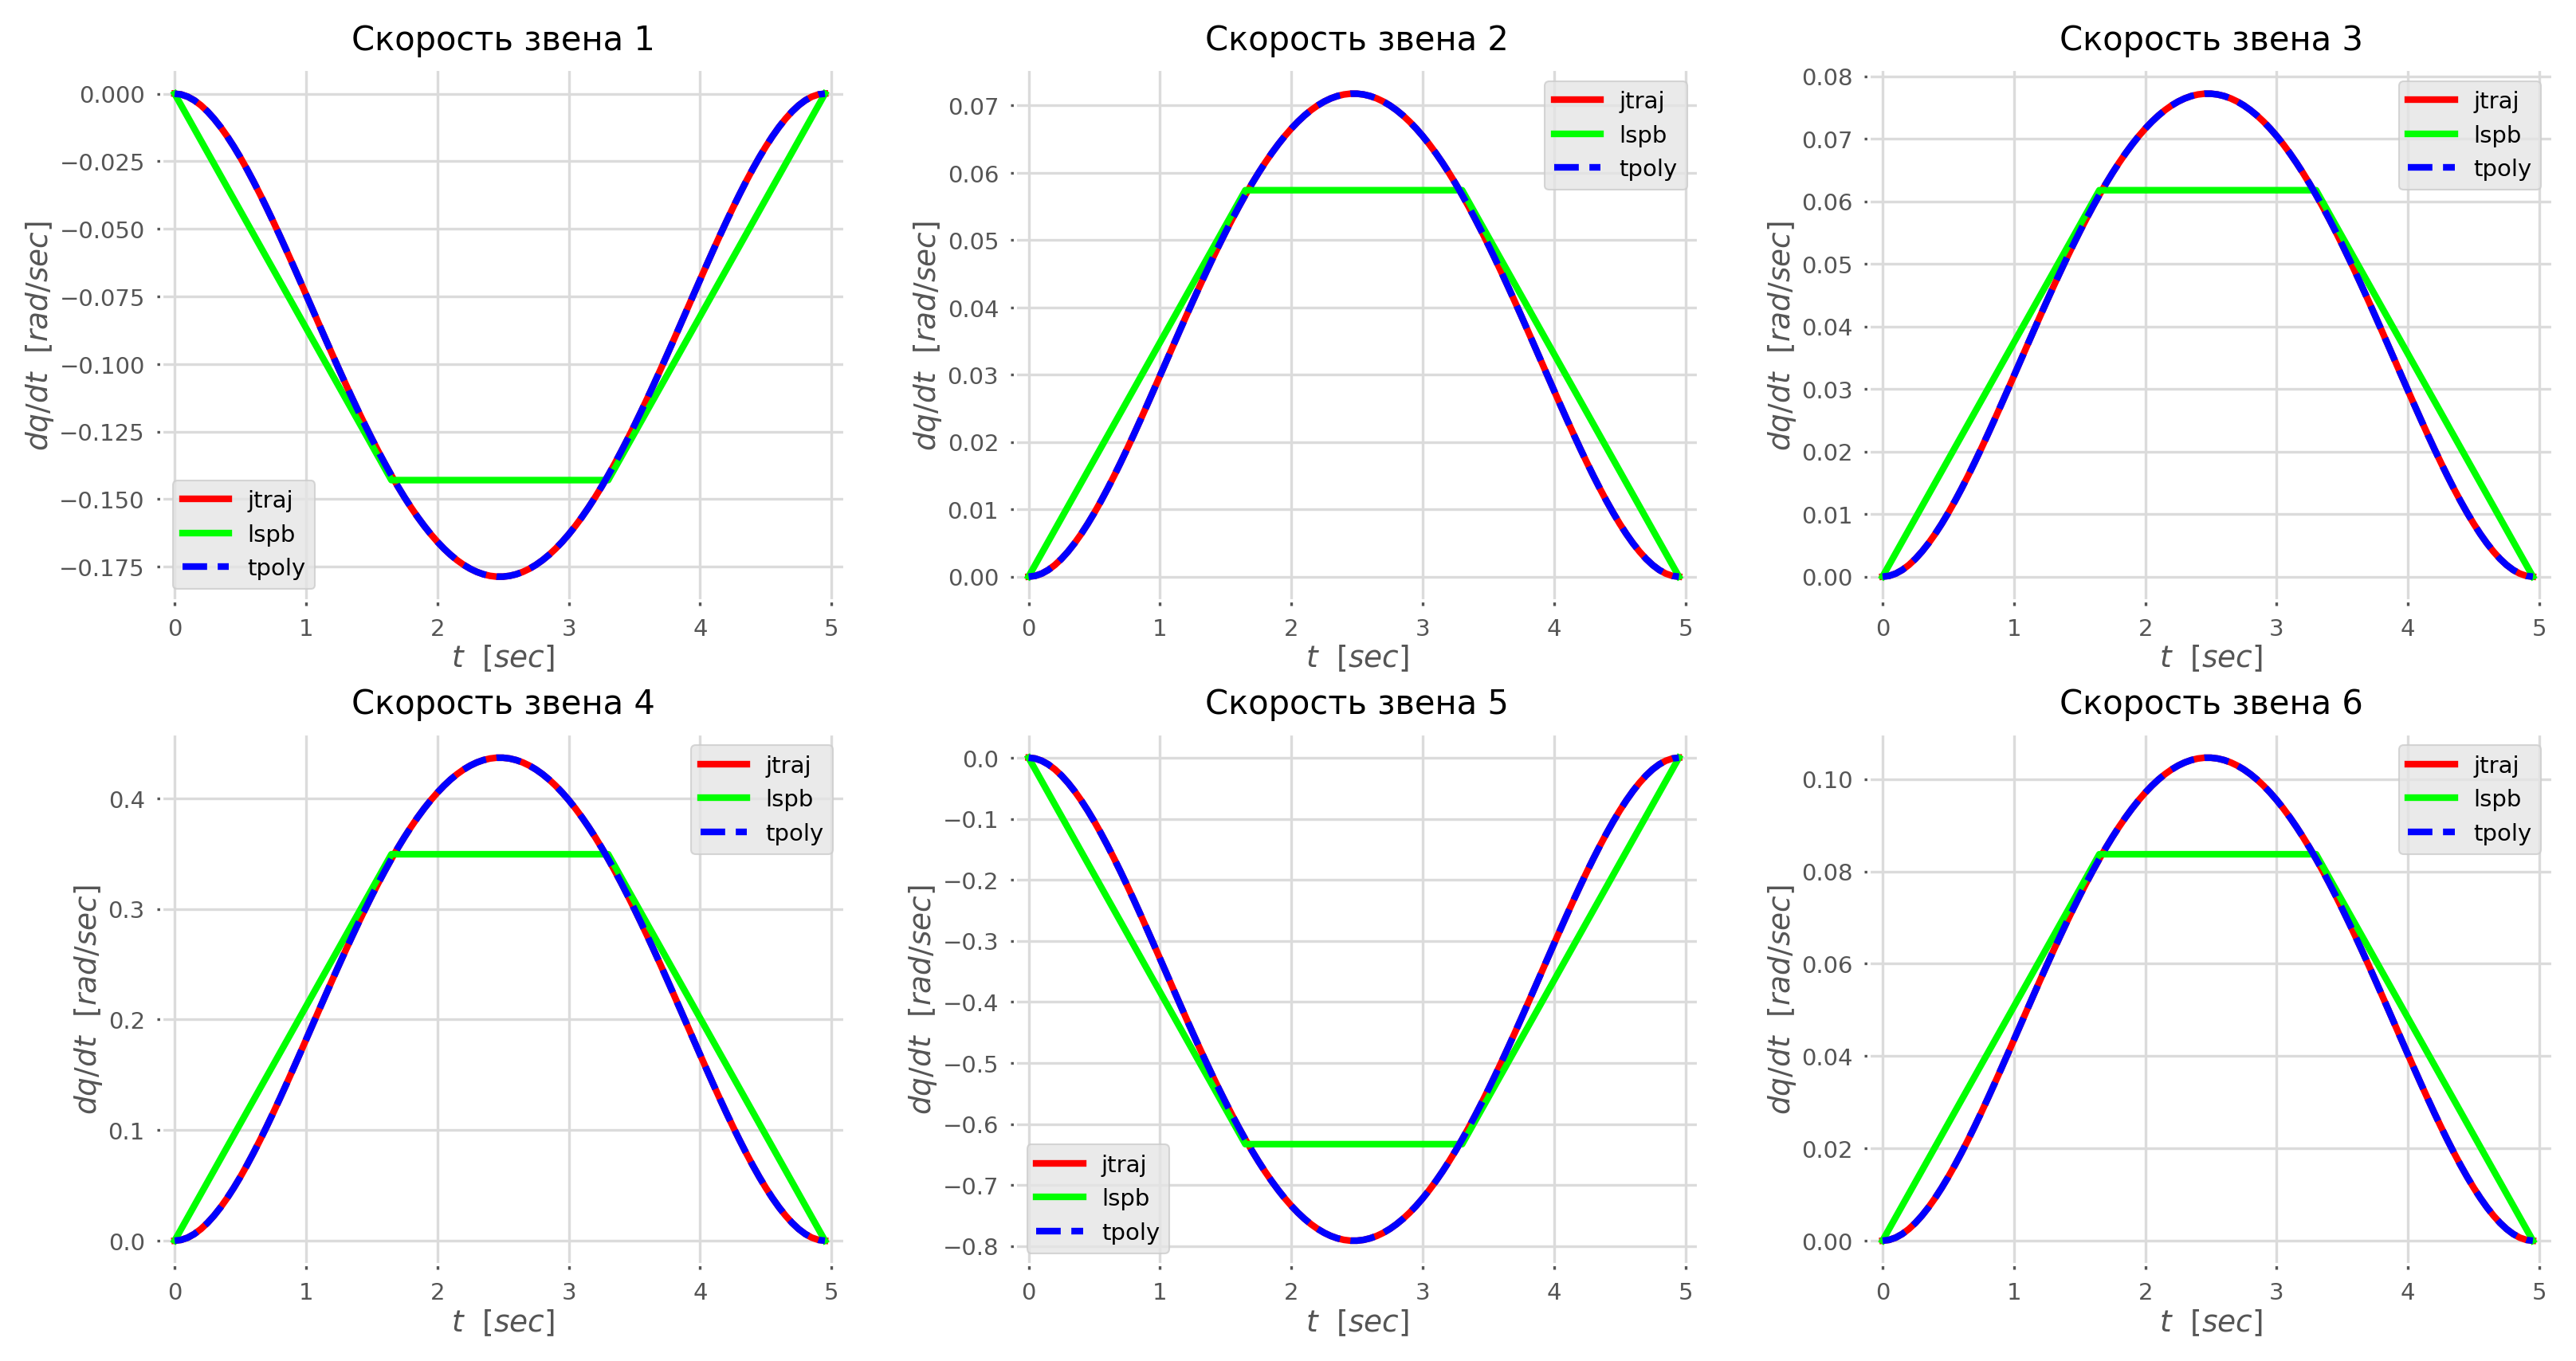

In [55]:
plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.25, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.qd[i][g-1] for i in range(len(tr_jtraj.qd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.qd[i][g-1] for i in range(len(tr_trap.qd))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.qd[i][g-1] for i in range(len(tr_quin.qd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Скорость звена {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$dq/dt$  [$rad/sec$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

Построим графики ускорений для каждого звена

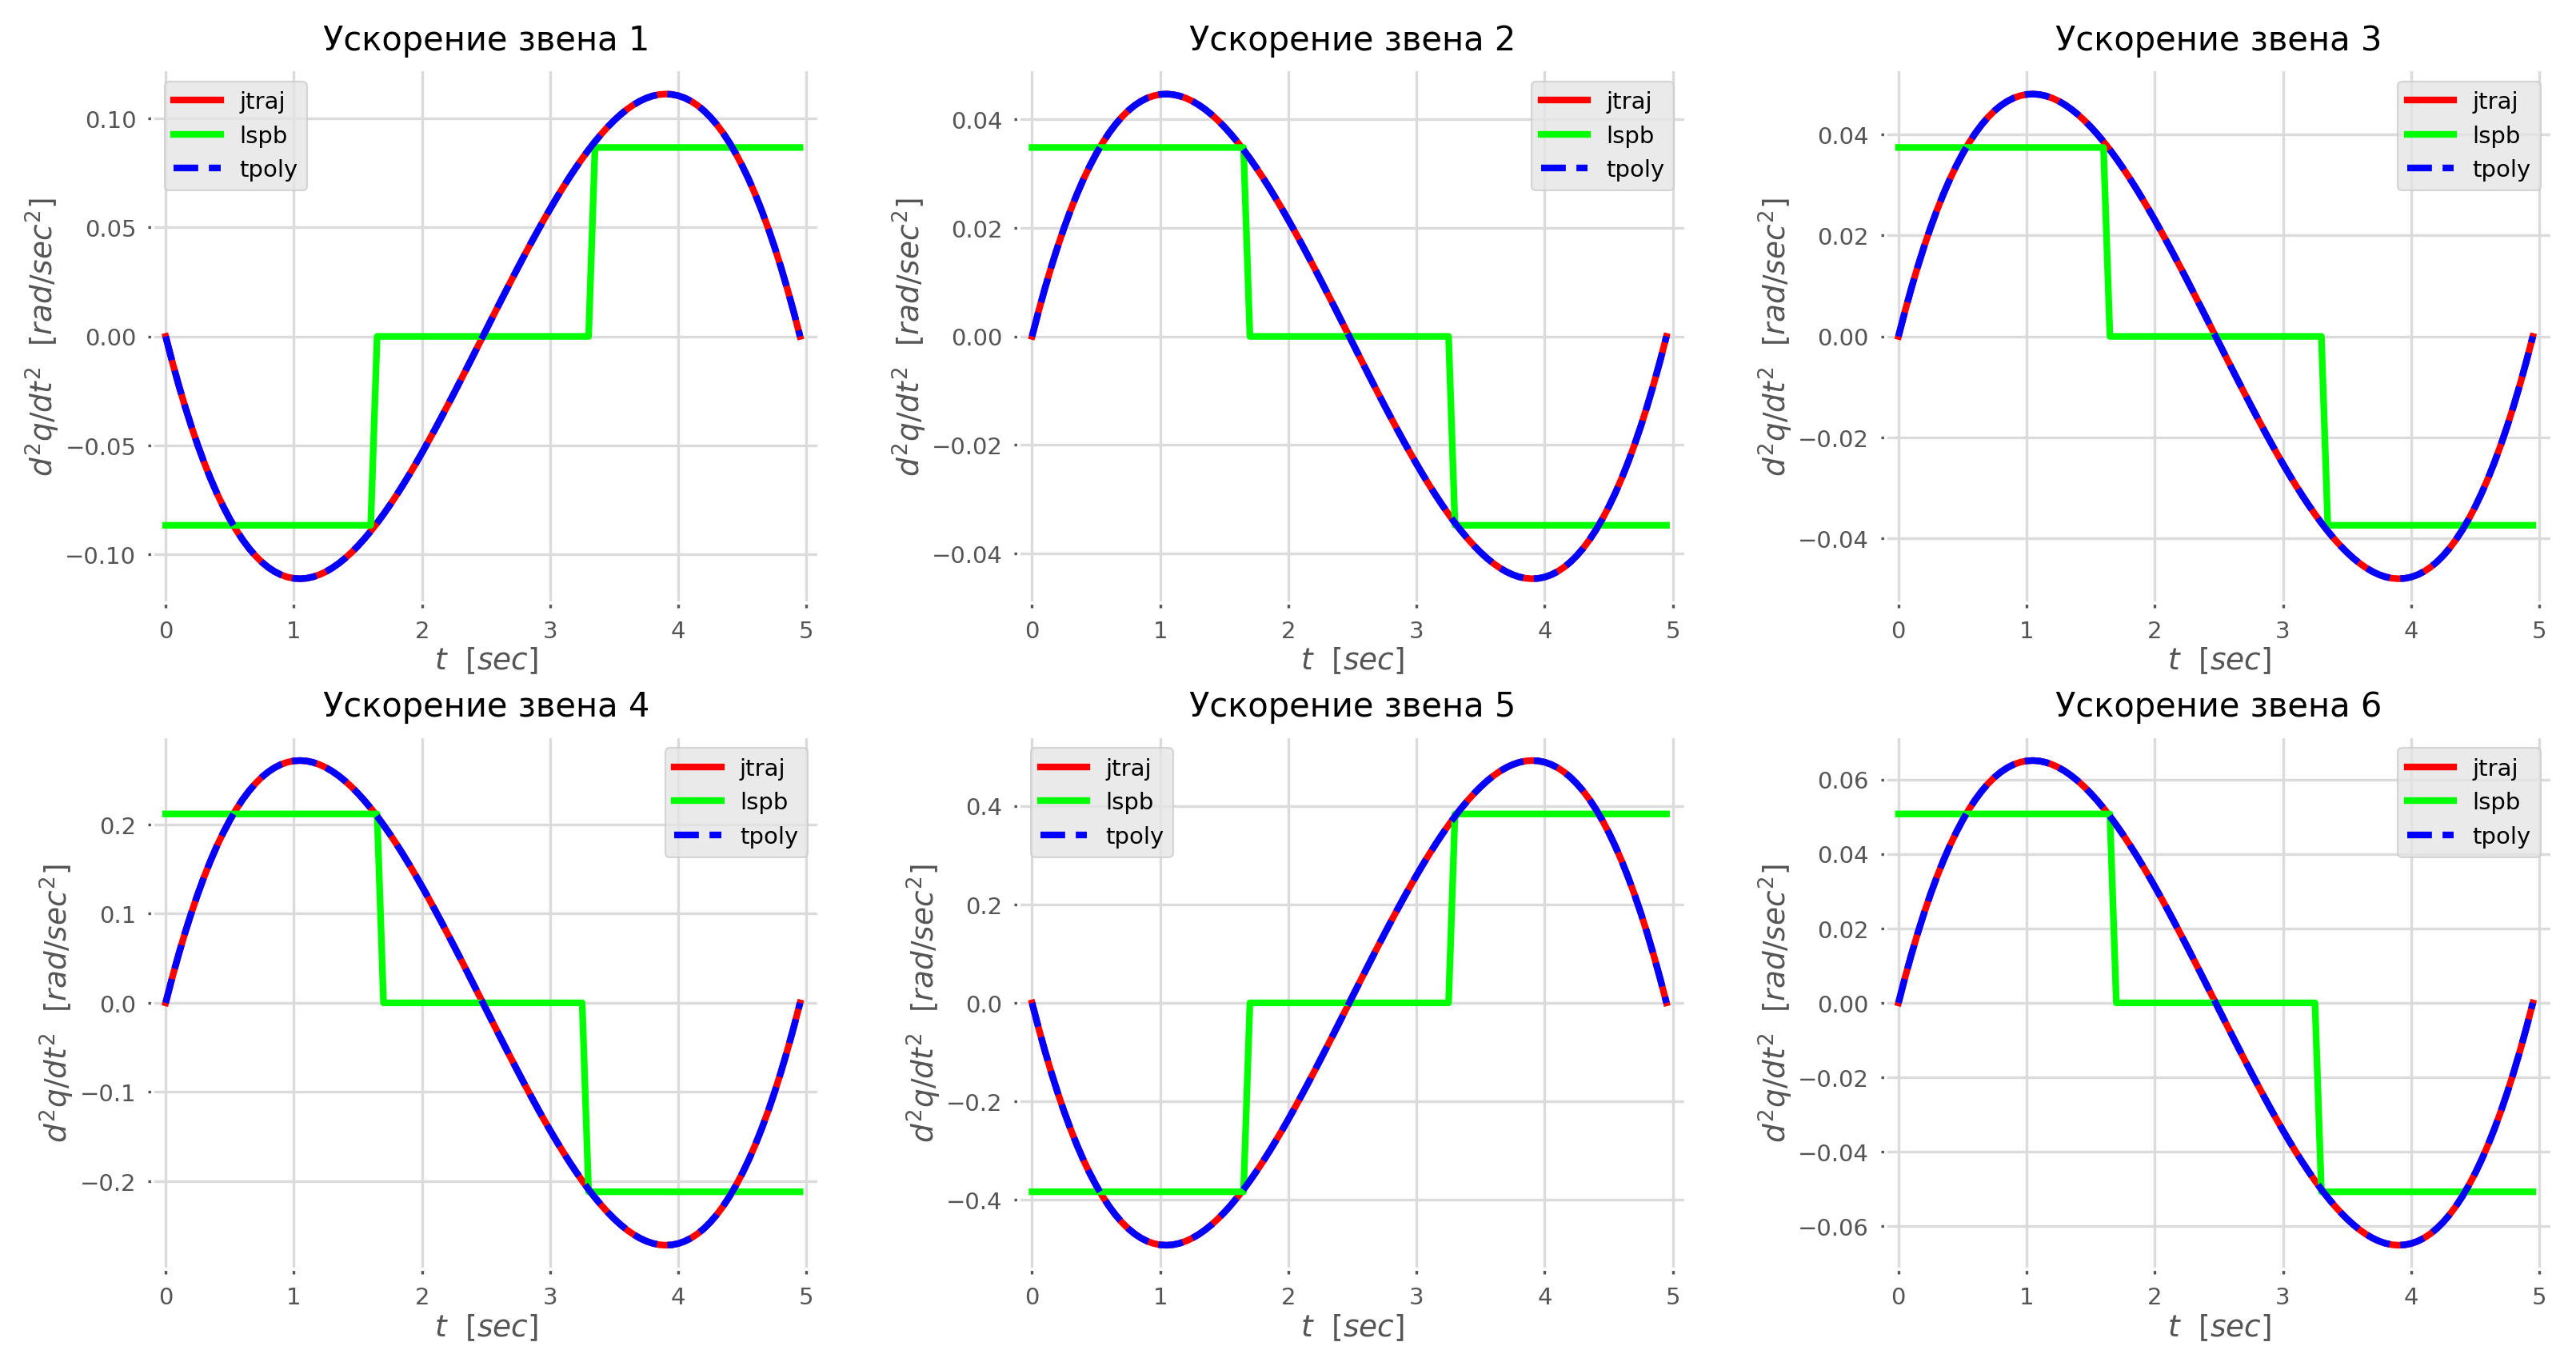

In [56]:
fig = plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.3, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.qdd[i][g-1] for i in range(len(tr_jtraj.qdd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.qdd[i][g-1] for i in range(len(tr_trap.qdd))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.qdd[i][g-1] for i in range(len(tr_quin.qdd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Ускорение звена {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"${d^2}q/d{t^2}$  [$rad/{sec}^2$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

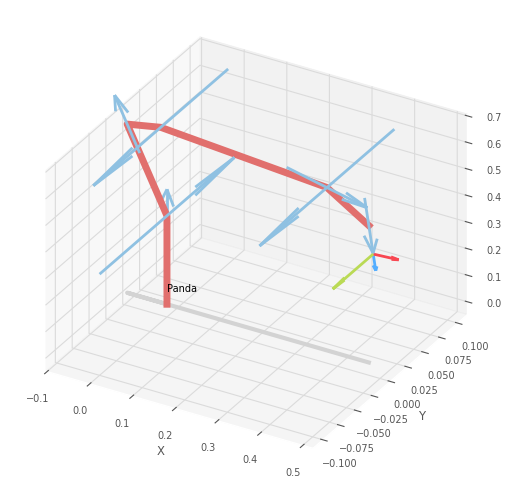

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Panda')

<Figure size 640x480 with 0 Axes>

In [57]:
robot.plot(robot.qr, block=False)  # Анимация движения робота

## **Key Conclusions from the Trajectory Planning Experiment:**

### **1. Trajectory Planning Methods Comparison**
- **Three methods successfully implemented**: `jtraj`, `mtraj` with trapezoidal, and `mtraj` with quintic
- **Quintic polynomial** provides the smoothest acceleration profiles (continuous derivatives)
- **Trapezoidal method** offers good balance between smoothness and computational efficiency
- **jtraj** produces acceptable results but with less control over velocity profiles

### **2. Joint Behavior Analysis**
- **Different joints exhibit varying motion patterns** due to their roles in the kinematic chain
- **Joints 1-3** (base joints) show larger angular displacements for workspace coverage
- **Joints 4-7** (wrist joints) provide fine positioning and orientation control
- **Joint limits are respected** throughout all planned trajectories

### **3. Workspace Construction Insights**
- **4-joint workspace construction** provides comprehensive coverage of reachable positions
- **Fixed joint configurations** significantly impact workspace shape and size
- **Realistic start positions** are crucial for practical trajectory planning applications

### **4. Inverse Kinematics Validation**
- **Gauss-Newton method** (`ikine_GN`) successfully solves for target positions within workspace
- **End-effector positioning** achieves desired coordinates with acceptable accuracy
- **Joint configuration** remains within physical limits for all planned trajectories


### **6. Performance Characteristics**
- **Smooth velocity transitions** minimize mechanical stress on actuators
- **Continuous acceleration profiles** reduce jerk and improve motion quality
- **Time-optimal planning** balances speed with smoothness constraints

**Overall**: The analysis demonstrates successful implementation of multiple trajectory planning approaches for a 7-DOF Panda robot, with quintic polynomial method showing superior smoothness characteristics for industrial applications.
